# Metadata

```
Course:   DS 5001
Module:   10 Lab
Topic:    Import General Inquirer Sentiment Lexicon
Author:   R.C. Alvarado

Purpose:  Convert General Inquirer lexicon into usable form. 
```

# Set Up

In [1]:
data_home = '../data'

In [2]:
import pandas as pd
import numpy as np

# Get Data

* General Inquirer lexicon info page: http://www.wjh.harvard.edu/~inquirer/spreadsheet_guide.htm **&#8592; DEAD**
* Download [the spreadsheet](http://www.wjh.harvard.edu/~inquirer/inquirerbasic.xls). **&#8592; DEAD**
* May have to install `xlrd` because sheet has 186 columns.

In [3]:
GI = pd.read_excel(f'{data_home}/salex/sources/general-inquirer/inquirerbasic.xls', false_values=None)

In [4]:
GI.shape

(11788, 186)

In [5]:
GI

,Entry,Source,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,Othtags,Defined
0,A,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DET ART,| article: Indefinite singular article--some o...
1,ABANDON,H4Lvd,NaN,Negativ,NaN,NaN,Ngtv,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|
2,ABANDONMENT,H4,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|
3,ABATE,H4Lvd,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|
4,ABATEMENT,Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11783,ZENITH,H4,Positiv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|
11784,ZERO,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DET,|
11785,ZEST,H4,Positiv,NaN,NaN,NaN,NaN,NaN,Strong,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|
11786,ZINC,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|


# Get Data Dictionary

In [6]:
%%time

# Import text file
DD = pd.DataFrame(dict(line_str=open(f"{data_home}/salex/sources/general-inquirer/gi-data-dict.txt", 'r').readlines()))

# Extract Source Headers
DD.loc[DD.line_str.str.match(r'^# '), 'src_id'] = DD.line_str.str.replace('# ','').str.replace('\|.+$','', regex=True).str.strip()
# Could create SRC table
DD.src_id = DD.src_id.ffill()
DD = DD[~DD.line_str.str.match(r'^# ')].copy()

# Extract Section Headers
DD.loc[DD.line_str.str.match(r'^## '), 'sect_id'] = DD.line_str.str.replace('## ','').str.replace(':.+$','', regex=True).str.strip()
# Could create SECT table
DD.sect_id = DD.sect_id.ffill()
DD = DD[~DD.line_str.str.match(r'^## ')].copy()

# Extract Category info
DD['category_id'] = DD.line_str.apply(lambda x: x.split()[0])
DD['category_n'] = DD.line_str.apply(lambda x: x.split()[1])
DD['category_def'] = DD.line_str.apply(lambda x: ' '.join(x.split()[2:]))

# Fix up table
DD = DD.set_index('category_id')
assert DD.index.is_unique
DD['category_label'] = DD.apply(lambda x: f"{x.name} [{x.sect_id}]: {x.category_def[:80]}" , 1)
DD = DD.drop('line_str', axis=1)

CPU times: user 15.2 ms, sys: 1.2 ms, total: 16.4 ms
Wall time: 24.3 ms


In [7]:
DD

,src_id,sect_id,category_n,category_def,category_label
category_id,,,,,
Positiv,New,1,"1,915",words of positive outlook. (It does not contai...,Positiv [1]: words of positive outlook. (It do...
Negativ,New,1,"2,291",words of negative outlook (not including the s...,Negativ [1]: words of negative outlook (not in...
Pstv,Harvard IV-4,2,1045,"positive words, an earlier version of Positiv.","Pstv [2]: positive words, an earlier version o..."
Affil,Harvard IV-4,2,557,a subset of words are also tagged for words in...,Affil [2]: a subset of words are also tagged f...
Ngtv,Harvard IV-4,2,1160,"negative words, an earlier version of Negativ.","Ngtv [2]: negative words, an earlier version o..."
...,...,...,...,...,...
SureLw,Lasswell,26,175,"words indicating ""a feeling of sureness, certa...","SureLw [26]: words indicating ""a feeling of su..."
If,Lasswell,26,132,"words ""denoting feelings of uncertainty, doubt...","If [26]: words ""denoting feelings of uncertain..."
NotLw,Lasswell,26,25,"words ""that show the denial of one sort or ano...","NotLw [26]: words ""that show the denial of one..."


# Handle variant terms 

The source data uses the suffix `#n` to distinguish variant meanings of terms. We want to combine these into one term and have a separate
feature to distinguish each variant.

In [8]:
GI['split'] = GI.Entry.str.split(r'[#_]+')

Now add a 1 to terms that had no variants.

In [9]:
# Function to add 1 to terms without variants
def add_1(x):
    try:
        if len(x) == 1:
            x = x + ['1']
    except:
        print(x)
        x = 0
    return x

In [10]:
GI['split'] = GI['split'].apply(add_1)
GI['term_str'] = GI['split'].apply(lambda x: x[0].lower(), 1)
GI['term_var'] = GI['split'].apply(lambda x: x[1], 1).astype('int')
GI = GI.set_index(['term_str', 'term_var'])
GI = GI.sort_index()

See the distribution of variant counts. Most terms have only one variant.

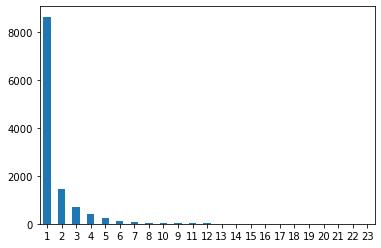

In [11]:
GI.reset_index().term_var.value_counts().plot.bar(rot=0);

In [12]:
GI.sample(10)

,,Entry,Source,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,Othtags,Defined,split
term_str,term_var,,,,,,,,,,,,,,,,,,,,,
ussr,1,USSR,Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun POLIT ECON PLACE,NaN,"[USSR, 1]"
say,5,SAY#5,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,FormLw,Noun,"| 0% noun: ""Saying""--aphorism, epigram, saw","[SAY, 5]"
necessary,3,NECESSARY#3,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,Strong,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,| 0% noun: Essentials,"[NECESSARY, 3]"
carry,3,CARRY#3,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,| 10% idiom-verb: 'carry on'--to manage or con...,"[CARRY, 3]"
singly,1,SINGLY,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LY,|,"[SINGLY, 1]"
work,3,WORK#3,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,"| 3% verb-idiom: ""Work out""--develop, find a s...","[WORK, 3]"
no,3,NO#3,H4Lvd,NaN,NaN,NaN,NaN,NaN,Hostile,NaN,NaN,...,NaN,NaN,NaN,NaN,NotLw,NaN,FormLw,Noun,"| 0% noun: ""A no""","[NO, 3]"
passenger,1,PASSENGER,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|,"[PASSENGER, 1]"
mind,5,MIND#5,H4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Modif,"| 2% adj: ""Minded""--having a certain kind of m...","[MIND, 5]"


# Convert column string values to numbers

Convert GI's string values into numbers.

In [13]:
try:
    GI.loc[GI.Positiv == 'Positiv', 'polarity'] = 1
    GI.loc[GI.Negativ == 'Negativ', 'polarity'] = -1
    GI['polarity'] = GI['polarity'].fillna(0).astype('int')
except TypeError as e:
    print(e, "--  This means you are re-running the script with values that have already been set.")

In [14]:
GI.polarity.sample(10)

term_str    term_var
deliver     1           0
embitter    1           0
want        2           0
intertwine  1           0
jeopardy    1          -1
bend        1           0
met         1           0
posterity   1           1
bar         5           0
defame      1          -1
Name: polarity, dtype: int64

# Subselect Category Columns

Restrict to columns in Data Dictionary `DD`.

In [15]:
VALCOLS = DD.index.tolist() # Should be same as: VALCOLS = GI.columns[2:-4]

In [16]:
# VALCOLS

In [17]:
GI1 = GI[VALCOLS].fillna(0).astype('bool').astype('int').copy()

In [18]:
GI1.loc['love']

,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,Weak,Submit,...,PtLw,Nation,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw
term_var,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Handle Sentiment

## Convert `Positiv` and `Negativ` to `sentiment` 

In [19]:
sents = GI1.query("Positiv > 0 | Negativ > 0").copy()

In [20]:
sents['sentiment'] =  sents.Positiv  - sents.Negativ

In [21]:
sents['sentiment'].sample(5)

term_str  term_var
bum       1          -1
beastly   1          -1
qualify   3           1
slothful  1          -1
heaven    1           1
Name: sentiment, dtype: int64

## Take mean sentiment of variants

In [22]:
GI2 = sents.groupby('term_str').sentiment.mean()

In [23]:
GI2.value_counts().sort_index()

-1.000000    1989
-0.500000       1
-0.333333       2
 0.000000       7
 0.333333       2
 0.428571       1
 0.500000       2
 0.600000       1
 1.000000    1621
Name: sentiment, dtype: int64

## Snap values to -1, 0, or 1

In [24]:
GI2 = np.sign(GI2).astype('int').to_frame()

In [25]:
GI2.shape

(3626, 1)

In [26]:
GI2.sample(10)

,sentiment
term_str,
warfare,-1
friend,1
derision,-1
distortion,-1
warlike,-1
capsize,-1
prime,1
harmful,-1
nobility,1


# Visualize

In [27]:
import sys; sys.path.append("../lib")

In [28]:
from pca import PCA
pca = PCA(GI1)
pca.norm_rows = True
pca.center_by_mean = True
pca.center_by_variance = True
pca.method = 'standard'
pca.compute_pca()

In [29]:
from hac2 import HAC
hac = HAC(pca.LOADINGS)
hac.labels = DD.category_label

<Figure size 432x288 with 0 Axes>

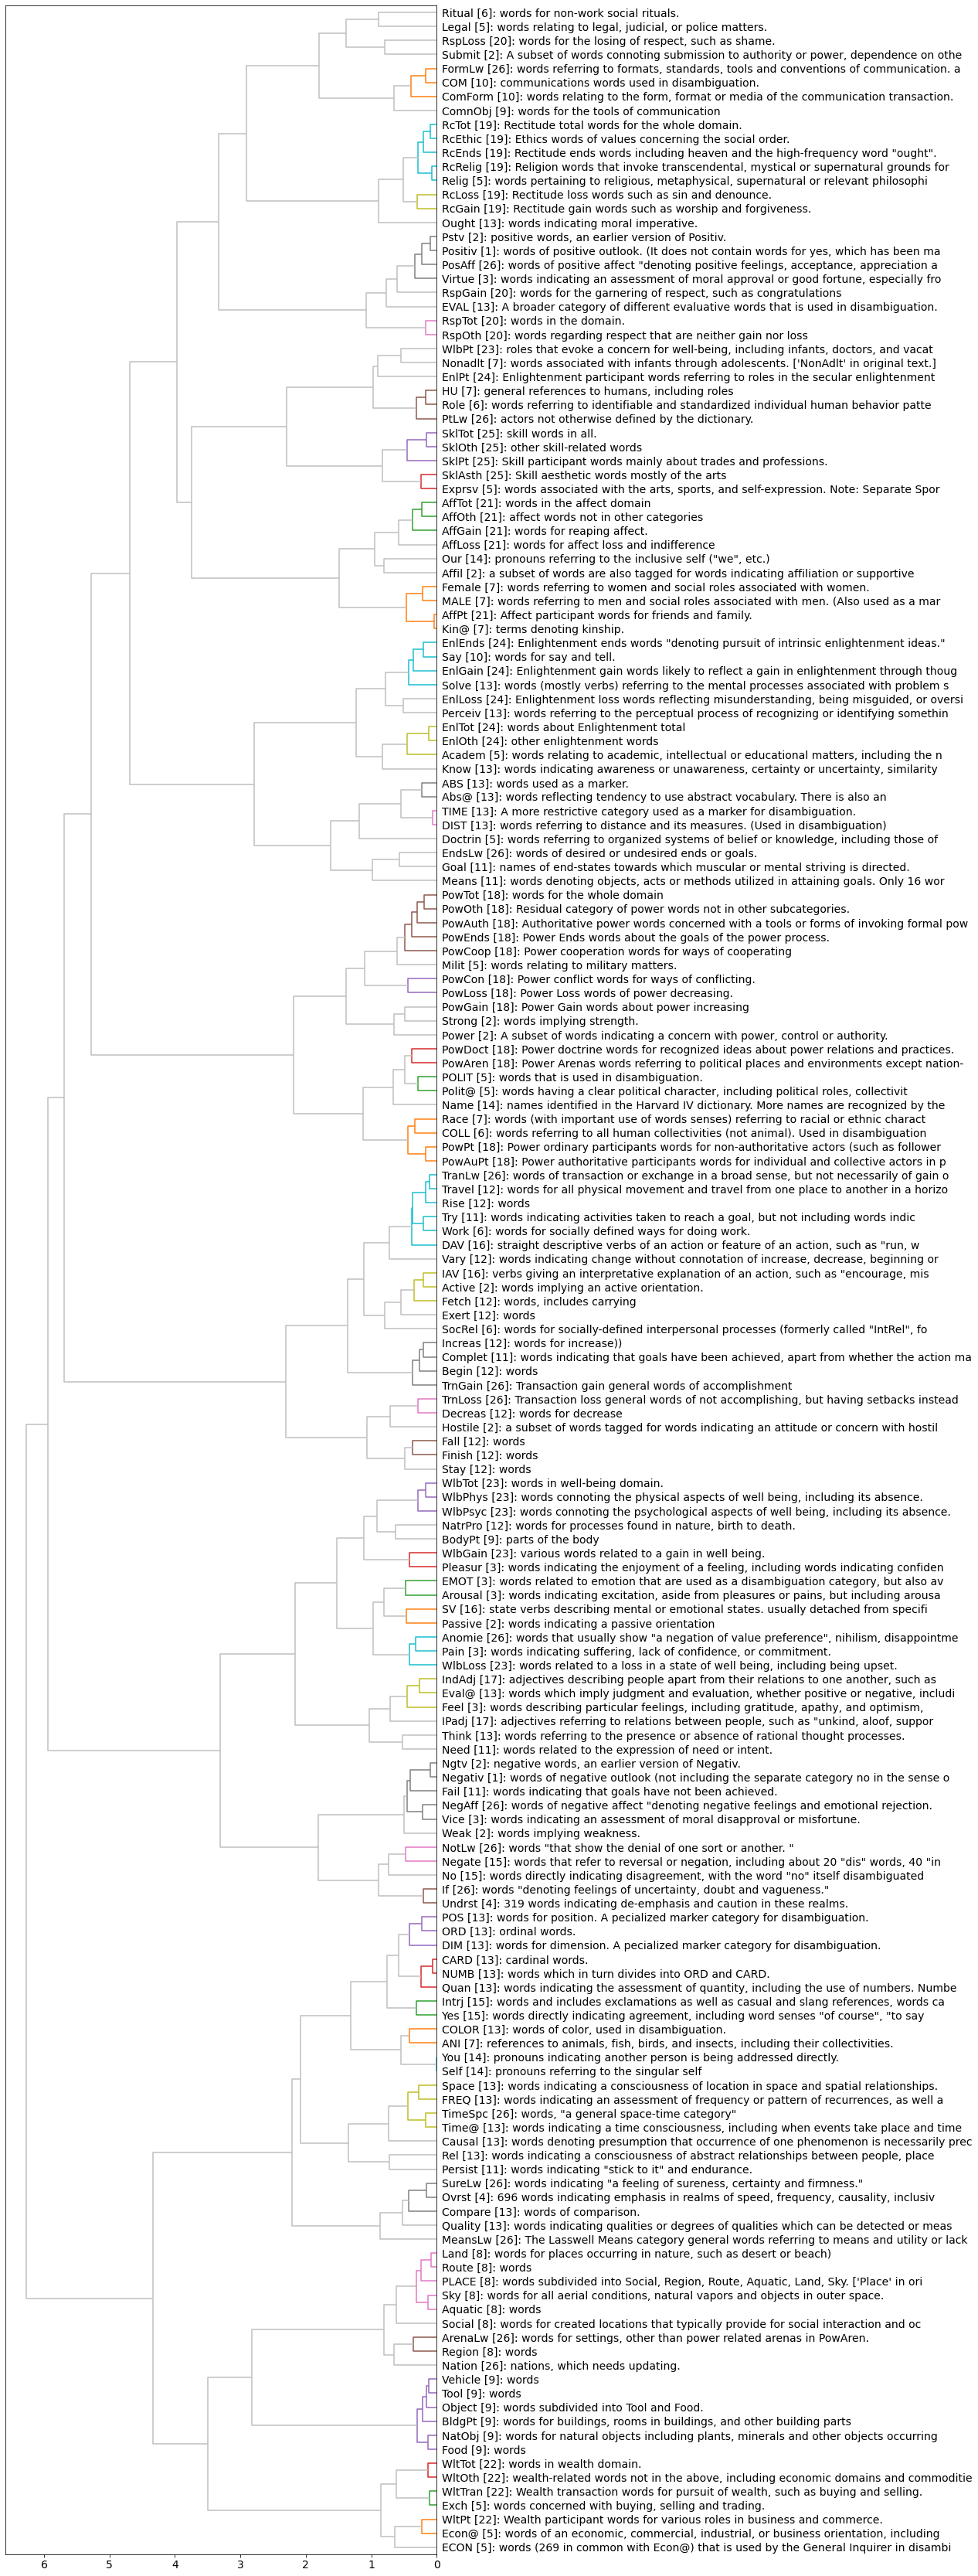

In [30]:
hac.plot()

In [31]:
import plotly_express as px

In [32]:
px.scatter(pca.LOADINGS.reset_index(), 0, 1,
           text='category_id',
           hover_name=DD.category_def, color=DD.sect_id,
           height=1000, width=1200)

ValueError: Value of 'text' is not the name of a column in 'data_frame'. Expected one of ['index', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9] but received: category_id

In [ ]:
px.scatter(pca.LOADINGS.reset_index(), 2, 3,
           text='category_id',
           hover_name=DD.category_def, color=DD.sect_id,
           height=1000, width=1200)

In [ ]:
px.scatter(pca.LOADINGS.reset_index(), 4, 5,
           text='category_id',
           hover_name=DD.category_def, color=DD.sect_id,
           height=1000, width=1200)

# Save

In [ ]:
DD.to_csv(f'{data_home}/salex/sources/general-inquirer/gi_dd.csv')
GI.to_csv(f'{data_home}/salex/sources/general-inquirer/gi_orig.csv')
GI1.to_csv(f'{data_home}/salex/sources/general-inquirer/gi_full.csv')
GI2.to_csv(f'{data_home}/salex/sources/general-inquirer/gi_sent_mean.csv')

# Appendix

**Faster but less elegant way to import the data dictionary.**

In [ ]:
# %%time
# import re

# dd = open(f"{data_home}/salex/sources/general-inquirer/gi-data-dict.txt", 'r').readlines()

# dd_data = []
# src_id = ''
# sect_id = ''

# for line in dd:

#     if re.match(r'^# ', line):        
#         src_id, src_def = line.split('|')
#         src_id = src_id.replace('#', '').strip()
#         continue

#     if re.match(r'^## ', line):
#         sect = line.split(':')
#         sect_id = sect[0].replace('##','').strip()
#         continue

#     else:
#         category = line.split()
#         category_id = category[0]
#         category_n = category[1].replace(',','')
#         try:
#             category_n = int(category_n)
#         except:
#             category_n = -1
#         category_def = ' '.join(category[2:])

#         dd_data.append((src_id, sect_id, category_id, category_n, category_def))

# DD = pd.DataFrame(dd_data, columns=['src_id','sect_id','category_id','category_n','category_def'])
# DD.category_n = DD.category_n.astype('int')
# DD = DD.set_index('category_id')
# assert DD.index.is_unique
# DD['category_label'] = DD.apply(lambda x: f"{x.name}: {x.category_def[:80]}" , 1)